# S&P 500 (SPY) Stock Analysis Final Project

In [64]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as p
import cpi
cpi.update

<function cpi.update()>

## Description of Data / Setting Up DataFrames:

        Date      Open      High       Low     Close  Adj Close   Volume
0   2/1/1993  43.96875  45.12500  42.81250  44.40625  25.296396  5417600
1   3/1/1993  44.56250  45.84375  44.21875  45.18750  25.741447  3019200
2   4/1/1993  45.25000  45.25000  43.28125  44.03125  25.201244  2697200
3   5/1/1993  44.09375  45.65625  43.84375  45.21875  25.880917  1808000
4   6/1/1993  45.37500  45.81250  44.21875  45.06250  25.791470  3438000
5   7/1/1993  45.12500  45.21875  44.15625  44.84375  25.848167  6117600
6   8/1/1993  44.90625  46.56250  44.84375  46.56250  26.838890  5440100
7   9/1/1993  46.40625  46.59375  44.81250  45.93750  26.478636  4369900
8  10/1/1993  45.87500  47.15625  45.71875  46.84375  27.169214  6972900
9  11/1/1993  46.78125  47.00000  45.53125  46.34375  26.879225  5351100
               Open
Date               
2/1/1993   43.96875
3/1/1993   44.56250
4/1/1993   45.25000
5/1/1993   44.09375
6/1/1993   45.37500
7/1/1993   45.12500
8/1/1993   44.90625
9/1/1993   46.406

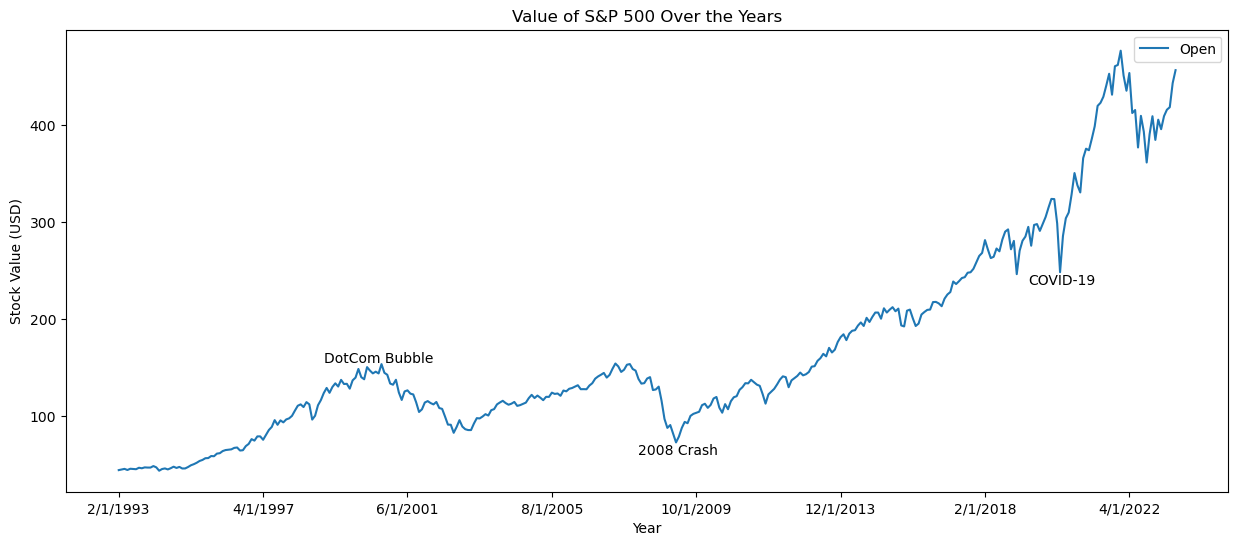

In [49]:
# import SPY stock data taken from Yahoo Finance
SPY_monthly = pd.read_csv('/Users/chadl/Downloads/SPY Inception-Current Monthly.csv')
#dislay first 10 rows of data
print(SPY_monthly.head(10))
#create dataframe using the Date and Open price columns
ts_SPY_monthly = SPY_monthly[['Date','Open']]
#change Date column to datetime
pd.to_datetime(ts_SPY_monthly['Date'])
#set index of dataframe to the date
ts_SPY_monthly = ts_SPY_monthly.set_index('Date')
print(ts_SPY_monthly.head(10))
#plot Date vs Open price
ts_SPY_monthly.plot(figsize = (15, 6))
#label x axis
plt.xlabel('Year',)
#label y axis
plt.ylabel('Stock Value (USD)')
#title graph
plt.title("Value of S&P 500 Over the Years")
plt.text(71,155,'DotCom Bubble')
plt.text(180,60,'2008 Crash')
plt.text(315,235,'COVID-19')
plt.show()

#### The data used for this project is visualized above and was generated by pulling from Yahoo Finance the monthly values of the SPDR S&P 500 ETF Trust (SPY) since its inception to now. This was used because the S&P 500 index is a very useful way to look at the overall market value and be able to pull useful and meaningful conclusions from one data set. The period was set to monthly because it appears as though it will still give sufficient fidelity while keeping the dataframe more manageable.

## Question:

#### Can the past performance of the S&P 500 be used to forecast its future performance with a statistically significant level of accurary?

## Hypothesis/Research:

#### H0 (Null Hypothesis): The past performance of the S&P 500 does not have any predictive power in forecasting its future performance.
#### In this hypothesis: The null hypothesis (H0) suggests that the historical data of the S&P 500 does not provide any information that would allow us to make significant predictions about its future performance.

#### Ha (Alternative Hypothesis): The past performance of the S&P 500 can be used to forecast its future performance with significant accuracy.
#### The alternative hypothesis (Ha) suggests the opposite: that the historical performance of the S&P 500 contains patterns or trends that can be captured by an ARIMA model to forecast future performance.


#### Research - This question was researched to give insight into the potential forecasting of the market based on past performnce. If there is a statistically significant degree of accuracy with which the future of the S&P can be forecasted, then a machine learning model could be taken advantage of to maximize potential returns on investment. A Seasonal Autoregressive Integrated Moving Average (SARIMA) was used to test if the future of the S&P 500 can be predcted based on past performance because it accounts for the seasonal aspect of the source stock data.

## Cleaning Data:


In [50]:
import pandas as pd
import cpi

# Load the dataset
csv_file_path = '/Users/chadl/Downloads/SPY Inception-Current Monthly.csv'
ts_SPY_monthly = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
ts_SPY_monthly['Date'] = pd.to_datetime(ts_SPY_monthly['Date'])

# Rename and extract year
SPY_inflation = ts_SPY_monthly.rename(columns={"Open": "current_dollars"})
SPY_inflation["Year"] = ts_SPY_monthly['Date'].dt.year

# Remove rows after the year 2022
SPY_inflation.drop(SPY_inflation[SPY_inflation['Year'] > 2022].index, inplace=True)

# Calculate inflation-adjusted values for the "Open" prices
SPY_inflation["real_dollars"] = SPY_inflation.apply(
    lambda x: cpi.inflate(x["current_dollars"], x["Year"]), 
    axis=1
)

# Display the last few rows
print(SPY_inflation.head(10))

        Date  current_dollars      High       Low     Close  Adj Close  \
0 1993-02-01         43.96875  45.12500  42.81250  44.40625  25.296396   
1 1993-03-01         44.56250  45.84375  44.21875  45.18750  25.741447   
2 1993-04-01         45.25000  45.25000  43.28125  44.03125  25.201244   
3 1993-05-01         44.09375  45.65625  43.84375  45.21875  25.880917   
4 1993-06-01         45.37500  45.81250  44.21875  45.06250  25.791470   
5 1993-07-01         45.12500  45.21875  44.15625  44.84375  25.848167   
6 1993-08-01         44.90625  46.56250  44.84375  46.56250  26.838890   
7 1993-09-01         46.40625  46.59375  44.81250  45.93750  26.478636   
8 1993-10-01         45.87500  47.15625  45.71875  46.84375  27.169214   
9 1993-11-01         46.78125  47.00000  45.53125  46.34375  26.879225   

    Volume  Year  real_dollars  
0  5417600  1993     89.049651  
1  3019200  1993     90.252169  
2  2697200  1993     91.644559  
3  1808000  1993     89.302812  
4  3438000  1993    

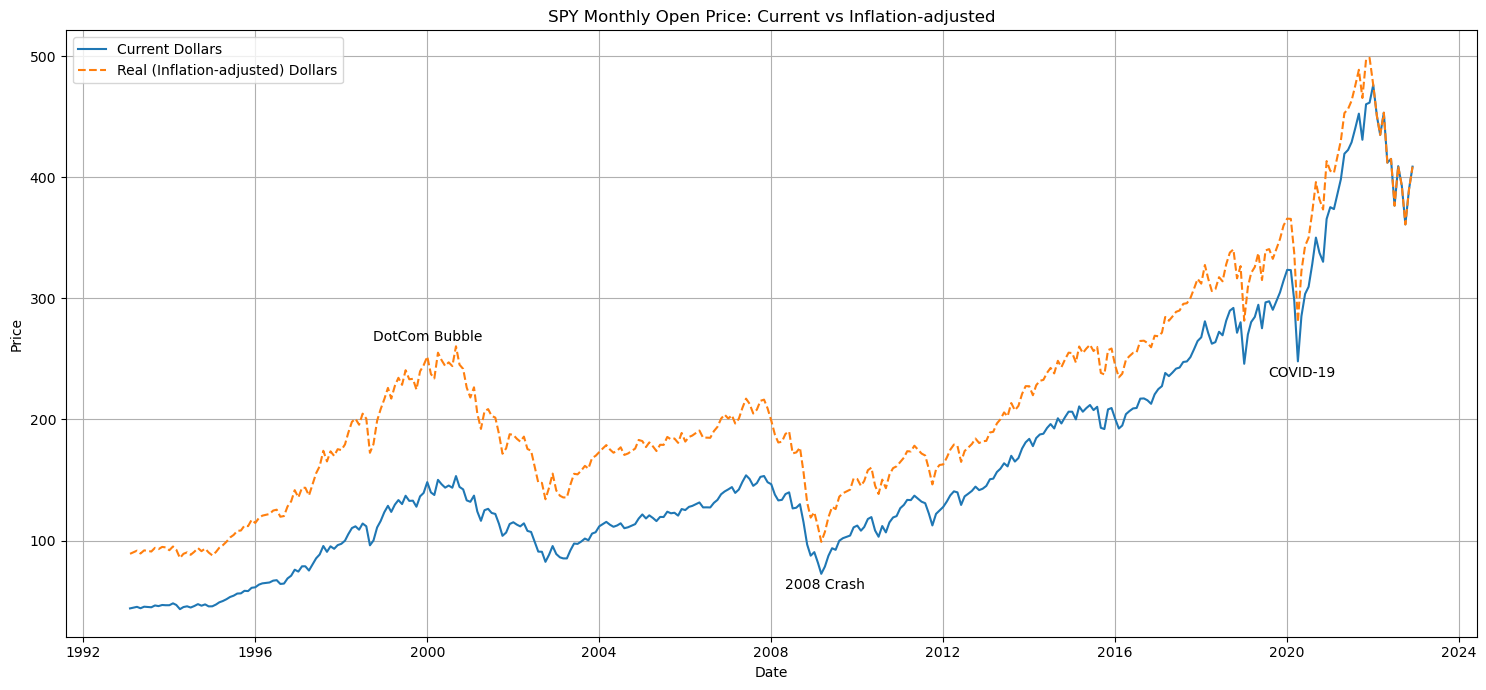

In [51]:
# Set the dataframe index to the 'Date' column for plotting purposes
SPY_inflation.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(SPY_inflation.index, SPY_inflation['current_dollars'], label='Current Dollars')
plt.plot(SPY_inflation.index, SPY_inflation['real_dollars'], label='Real (Inflation-adjusted) Dollars', linestyle='--')

# Labels for the plot
plt.title('SPY Monthly Open Price: Current vs Inflation-adjusted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.text(10500,265,'DotCom Bubble')
plt.text(14000,60,'2008 Crash')
plt.text(18100,235,'COVID-19')

# Display the plot
plt.tight_layout()
plt.grid(True)
plt.show()


#### The above code and associated plot shows the cleaned data, which accounts for inflation over the years. This is necessary so all the data is looked at as real infation adjusted dollars i.e. "todays money" and more accurate conclusions can be drawn from the below analyses.

## Running Analyses / Models:

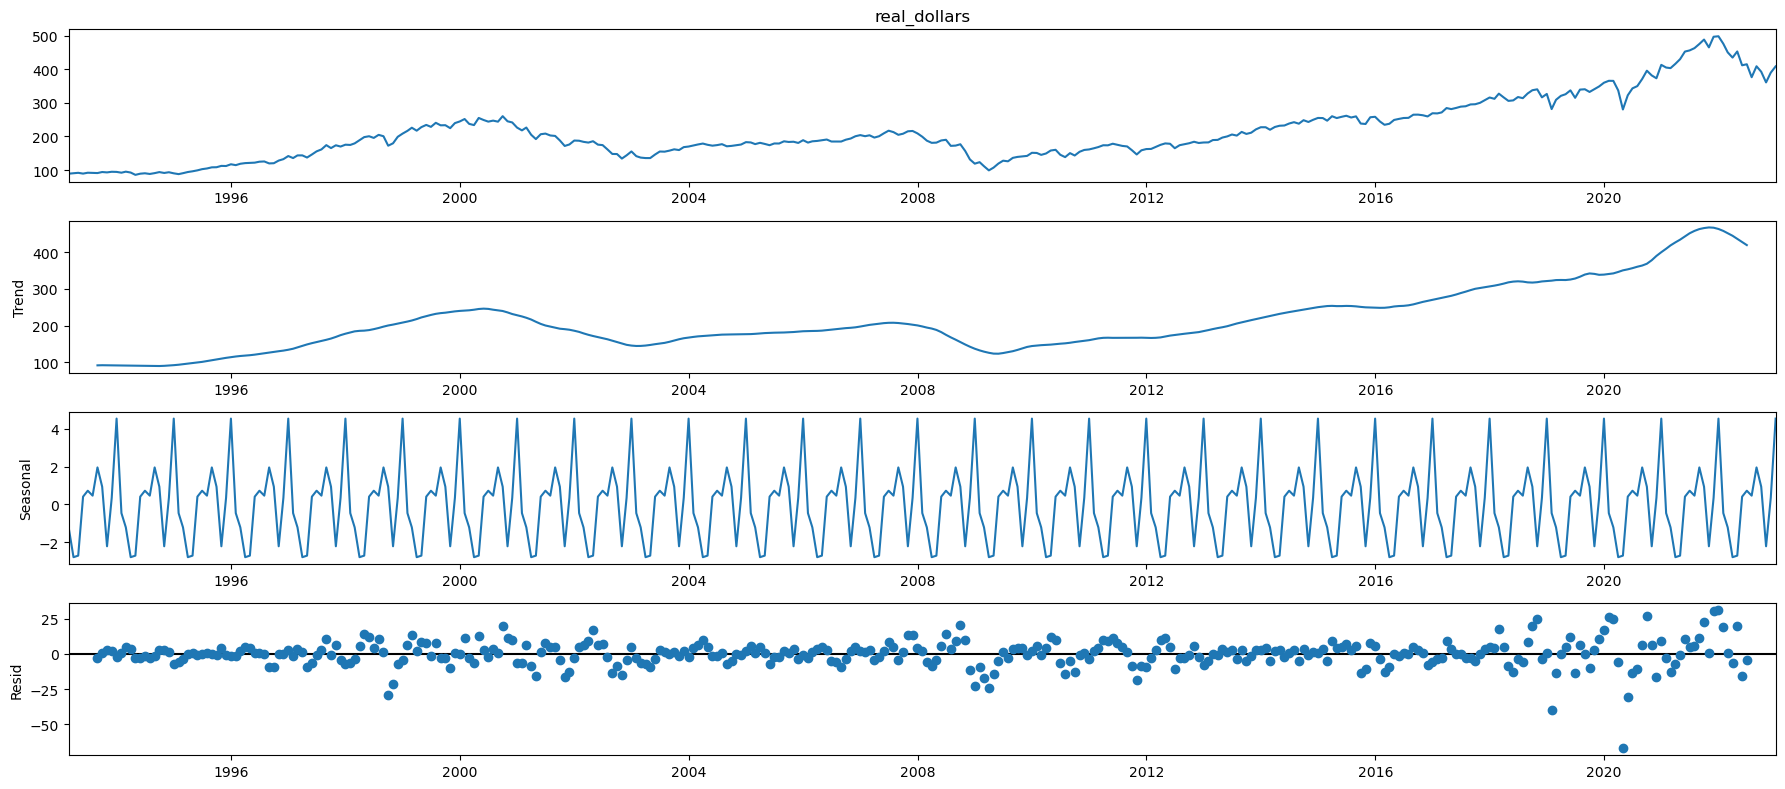

In [53]:
#Run decomposition on inflation adjusted "real dollars"
SPY_inf_Real_dollars = SPY_inflation[['real_dollars']]
resampled = SPY_inf_Real_dollars['real_dollars'].resample('M').mean()
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(resampled, model='additive')
#Plot decomposition
fig = decomposition.plot()
plt.show()


In [60]:
#Perfom dickey fuller test on the data to see if it is stationary
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(resampled))

Results of Dickey-Fuller Test:
Test Statistic                  -0.316517
p-value                          0.923132
#Lags Used                       2.000000
Number of Observations Used    356.000000
Critical Value (1%)             -3.448853
Critical Value (5%)             -2.869693
Critical Value (10%)            -2.571114
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                -1.486033e+01
p-value                        1.723124e-27
#Lags Used                     1.000000e+00
Number of Observations Used    3.560000e+02
Critical Value (1%)           -3.448853e+00
Critical Value (5%)           -2.869693e+00
Critical Value (10%)          -2.571114e+00
dtype: float64
None


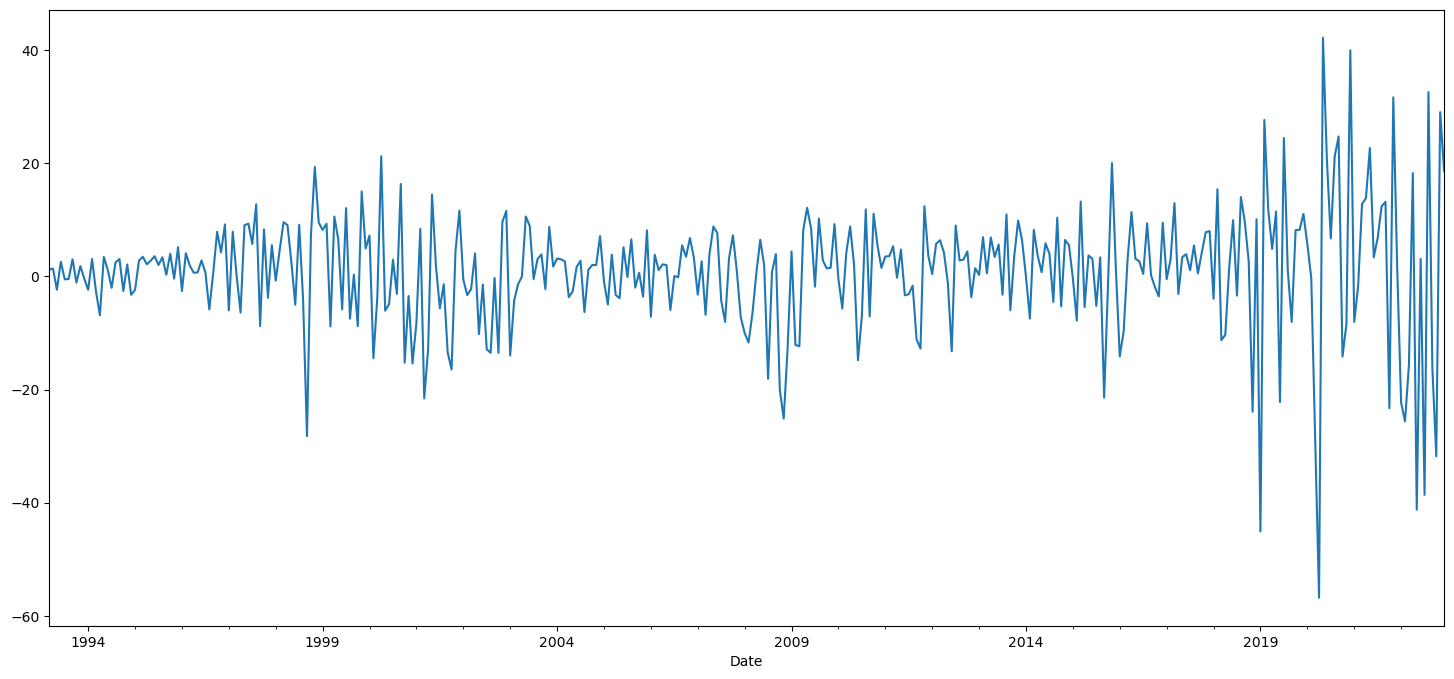

In [61]:
#Since the p-value was greater (0.92) than the critical value (0.05), perform first order differencing and then rerun dickey fuller test
ts_t_adj = resampled - resampled.shift(1)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

print(adf_test(ts_t_adj))
#P value of the below dickey fuller test is now less than the critical value (0.05) so data is stationary.

<Axes: xlabel='Date'>

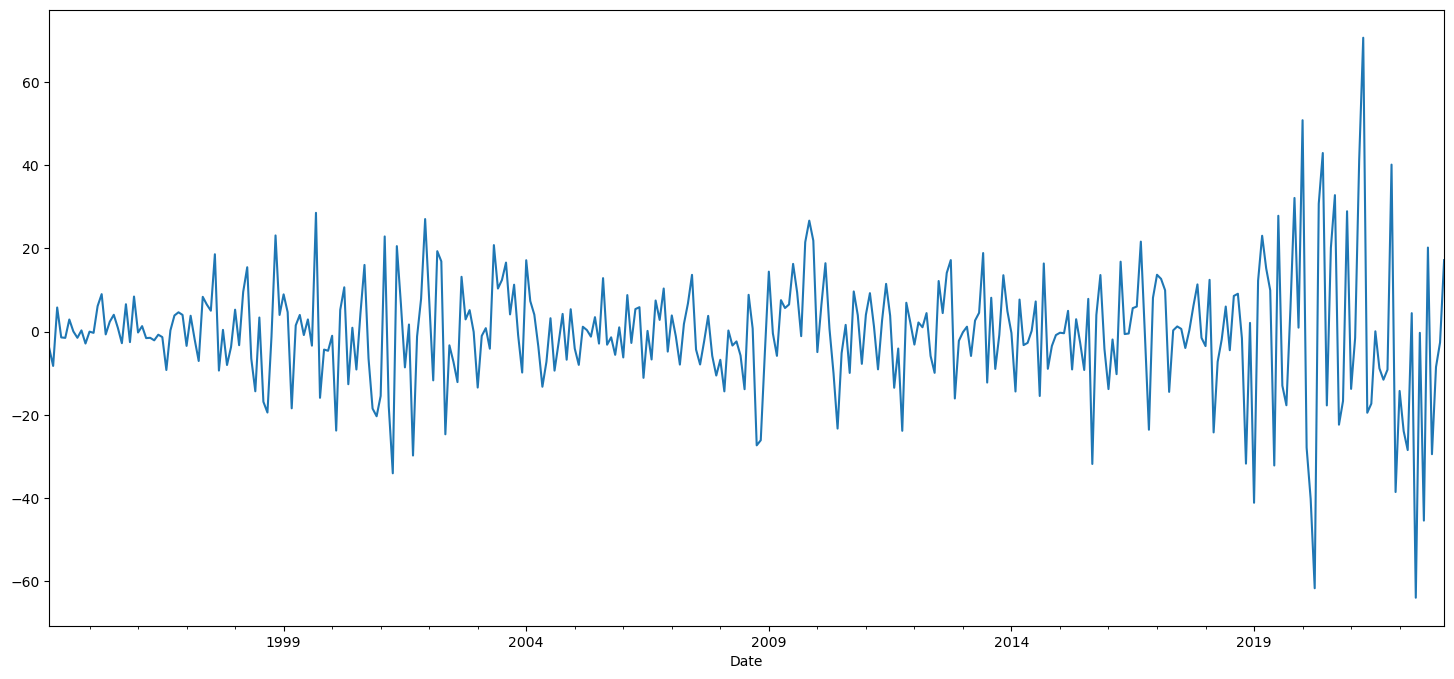

In [65]:
#Perform seasonal differencing with a lag of 12 months since the data is showing annual seasonality.
p.arima.nsdiffs(resampled,12)
ts_s_adj = ts_t_adj - ts_t_adj.shift(12)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()

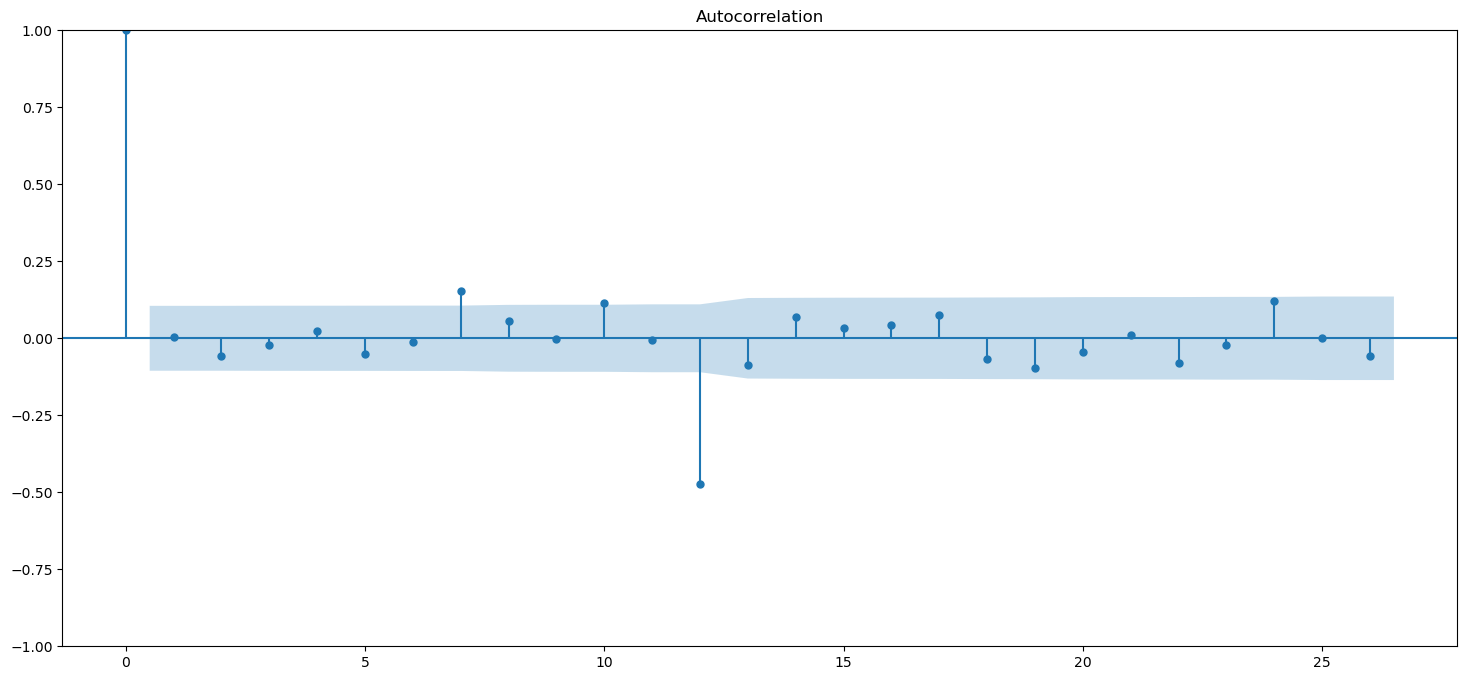

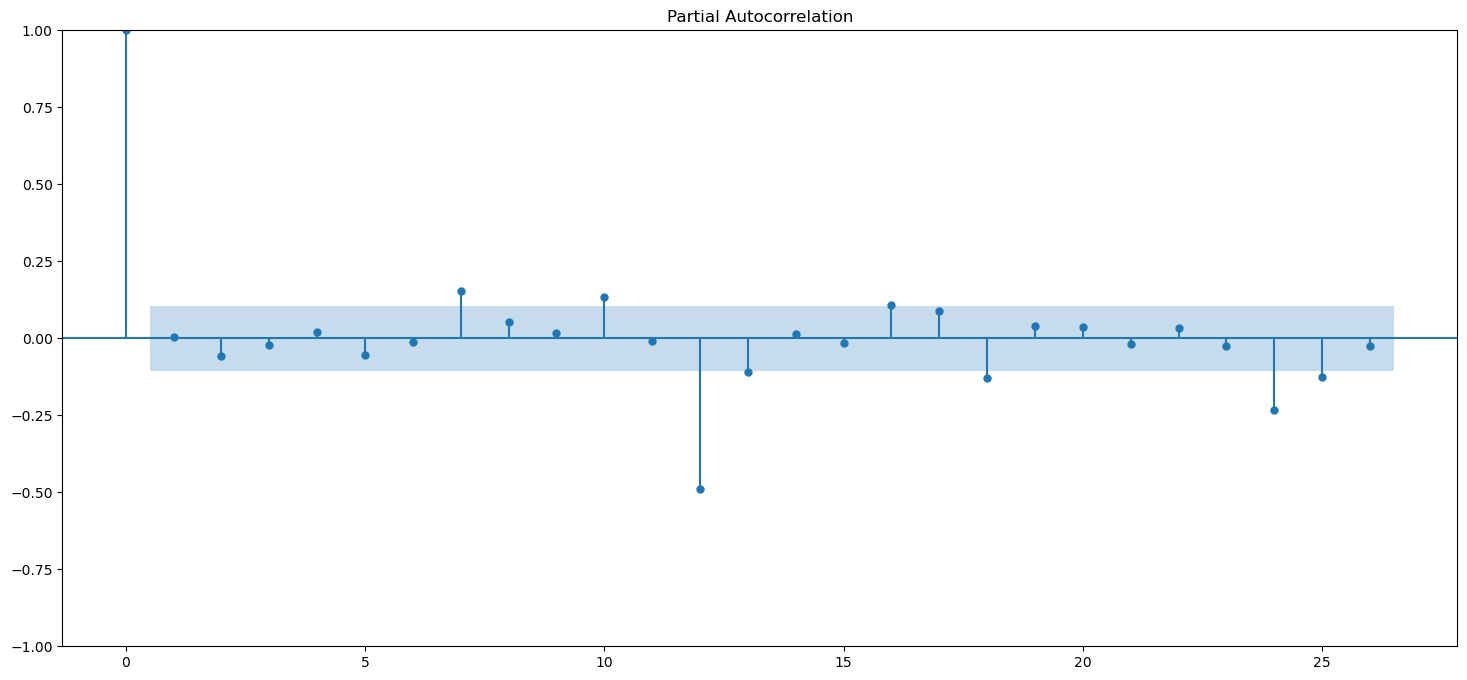

In [66]:
#plot autocorrelation and partial autocorrelation plots to be able to identify the remaining SARIMA parameter elements
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_s_adj)
matplotlib.pyplot.show()
plot_pacf(ts_s_adj)
matplotlib.pyplot.show()

In [67]:
#Parameters for the SARIMA taken from above graphs/models and fed into the below model
SARIMA = SPY_inflation[['real_dollars']]
initial = sm.tsa.statespace.SARIMAX(SARIMA,
                                order=(1, 1, 1),
                                seasonal_order=(3, 2, 3, 12))
initial_results = initial.fit(method = 'powell')
print(initial_results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 3.703810
         Iterations: 15
         Function evaluations: 1443
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0298      0.423     -0.071      0.944      -0.859       0.799
ma.L1         -0.0542      0.419     -0.129      0.897      -0.875       0.767
ar.S.L12      -0.4846      0.856     -0.566      0.571      -2.162       1.193
ar.S.L24       0.1219      0.191      0.637      0.524      -0.253       0.497
ar.S.L36      -0.0135      0.191     -0.070      0.944      -0.389       0.362
ma.S.L12      -1.3595      0.833     -1.631      0.103      -2.993       0.274
ma.S.L24      -0.1120      1.667     -0.067      0.946      -3.379       3.155
ma.S.L36       0.5028      0.875      0.574      0.566      -1.213       2.218
sigma2       128.7044     11.270     11.420      0.000     106.616    

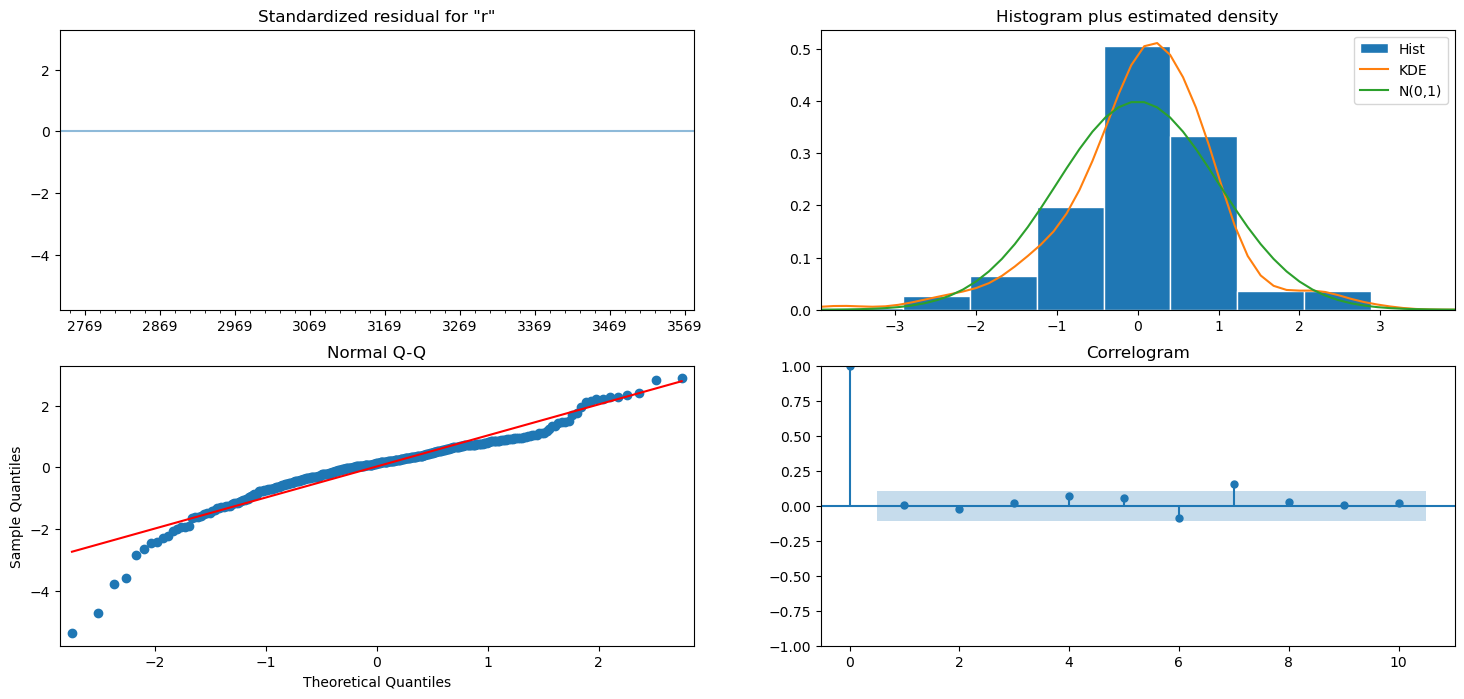

In [68]:
#plot result diagnostics
initial_results.plot_diagnostics(figsize=(18, 8))
plt.show()

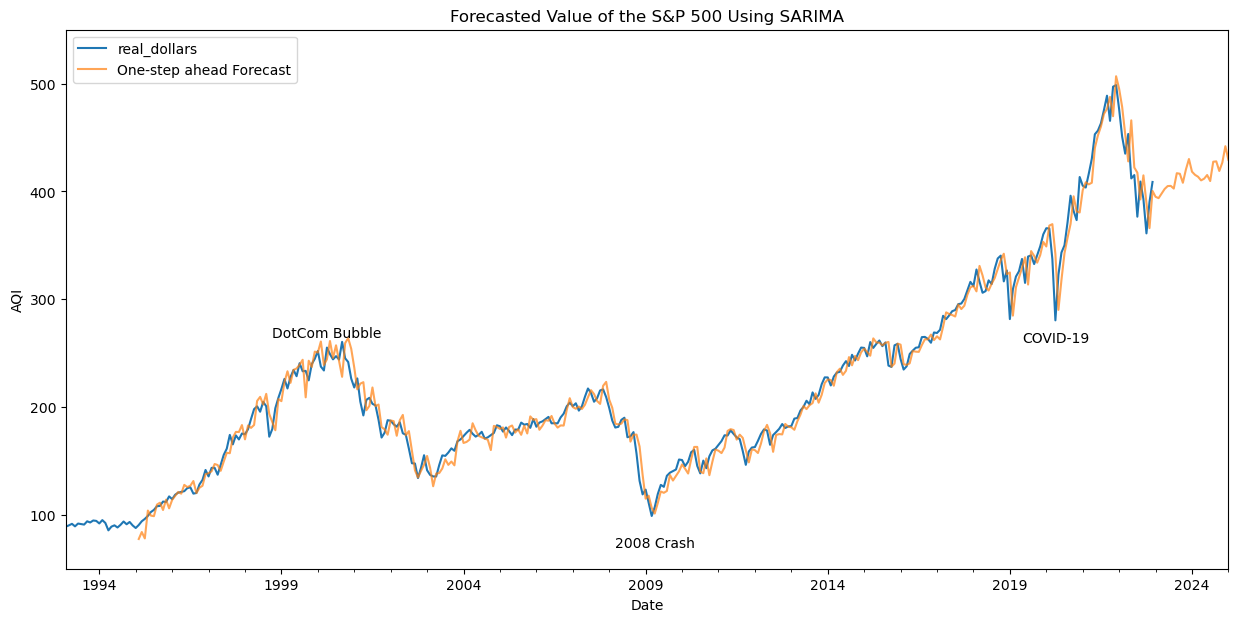

In [72]:
#plot overlay of inflation adjusted S&P 500 vs the SARIMA model with forecasted values 
initial_pred = initial_results.get_prediction(start=pd.to_datetime('1995-02-01'),end = pd.to_datetime('2025-01-01'),dynamic=False)
initial_pred_ci = initial_pred.conf_int()
ax = SARIMA.plot(label='observed')
initial_pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(15, 7))
ax.fill_between(initial_pred_ci.index,
                initial_pred_ci.iloc[:, 0],
                initial_pred_ci.iloc[:, 1], color='k', alpha=.2)
#label axis and title
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
ax.set_ylim([50, 550])
plt.title("Forecasted Value of the S&P 500 Using SARIMA")
#label major economic events so outliers are explained
plt.text(345,265,'DotCom Bubble')
plt.text(458,70,'2008 Crash')
plt.text(592,260,'COVID-19')
plt.legend()
plt.show()

## Interpret Results / Accuracy:

#### The above results for the initial SARIMA model look promising as it does track the actual values for the historical S&P 500 data quite well but it is also evident that the model could use some refinement. There are areas where the machine learning model data spikes or drops outside of an acceptable tolerance level in relation to the actual data. Due to these inconsistenties the trustworthiness of the future predicted data is also called into question as that forecasted data also looks very volatile. An improved SARIMA model will be explored next to try and correct these discrepancies in the model and clean up the future predictions. Overall this is a very good preliminary model and shows that the SARIMA method has promise for producing trustworthy future predictions for stock data.

## Adjustments / Improved Strategy:

#### Improved strategy will utilize a loop to fit different parameter combinations into the SARIMA model and generate Akaike Information Criterion (AIC) scores for each ones. The lower an respective AIC score means that the specific combination of parameters is a better ML model than ones with a higher score. Thus to generate the best model, the combination with the lowest AIC score will be found and then input into the SARIMA model.

In [73]:
# Generate PDQ with the different range of values that the paramters can be and display some example parameter combinations
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [77]:
# For loop fitting each parameter combination into the SARIMA model and outputting its respective AIC score.
# The best parameter combination can then be selected by the lowest AIC score.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_s_adj,order=param,seasonal_order=param_seasonal,)
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print('Parameter combination with lowest AIC Score: ARIMA(0, 1, 2)x(0, 1, 2, 12)12 with an AIC score of: 2677.7521337055423')

Optimization terminated successfully.
         Current function value: 4.777012
         Iterations: 1
         Function evaluations: 9
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:3307.692213741393
Optimization terminated successfully.
         Current function value: 4.353150
         Iterations: 3
         Function evaluations: 75
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:3016.3800619054364
Optimization terminated successfully.
         Current function value: 4.211380
         Iterations: 4
         Function evaluations: 141
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:2920.274719809166
Optimization terminated successfully.
         Current function value: 4.207616
         Iterations: 4
         Function evaluations: 175
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:2919.670058163222
Optimization terminated successfully.
         Current function value: 4.439749
         Iterations: 2
         Function evaluations: 48
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:3076.3065041918544
Optimization terminated successfully.

In [74]:
#Rerun SARIMA model with parameters from above code: ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:2677.7521337055423.\
#Using these optimized parameters will results in a more accurate ML model
SARIMA = SPY_inflation[['real_dollars']]
mod = sm.tsa.statespace.SARIMAX(SARIMA,
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 2, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 3.712401
         Iterations: 3
         Function evaluations: 158
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0864      0.032     -2.689      0.007      -0.149      -0.023
ma.L2         -0.0272      0.035     -0.775      0.439      -0.096       0.042
ma.S.L12      -0.9500      0.051    -18.632      0.000      -1.050      -0.850
ma.S.L24       0.0061      0.062      0.097      0.922      -0.116       0.128
sigma2       120.2894      5.750     20.919      0.000     109.019     131.560


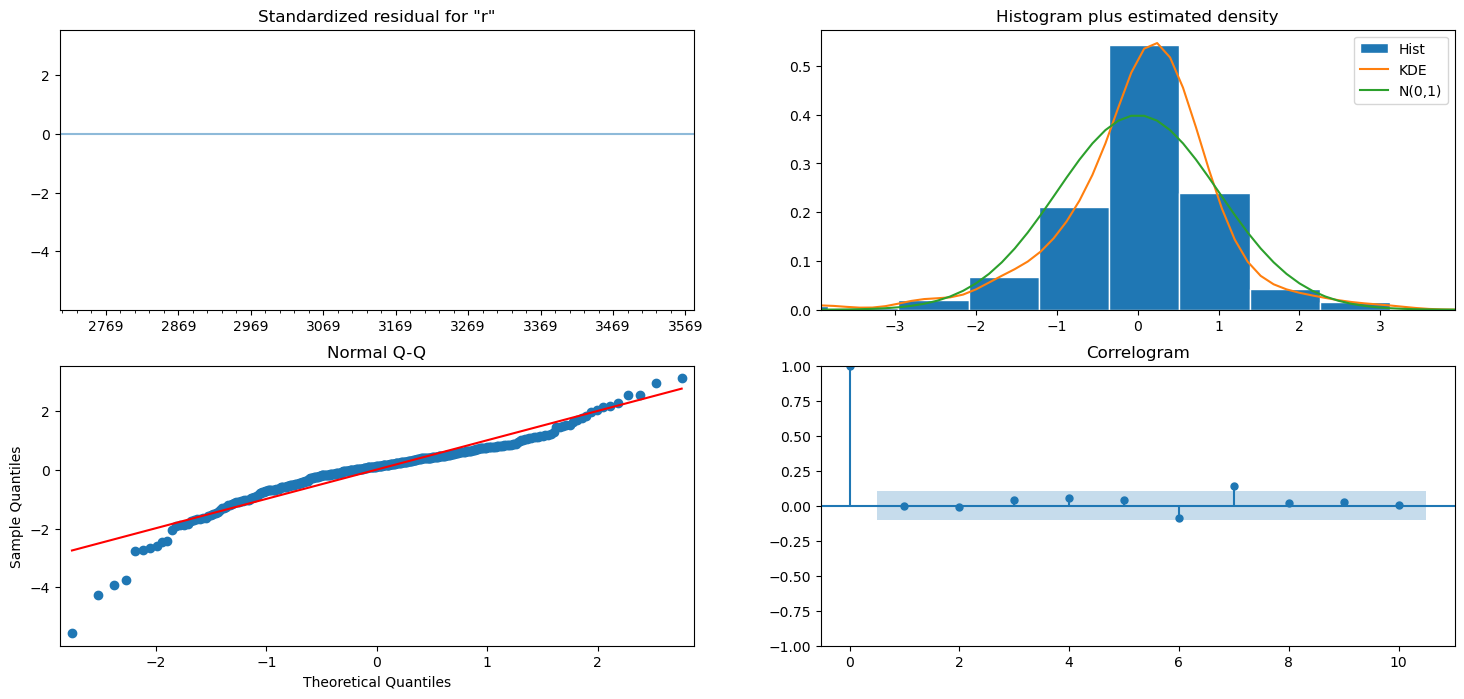

In [75]:
#plot improved model result diagnostics
results.plot_diagnostics(figsize=(18, 8))
plt.show()

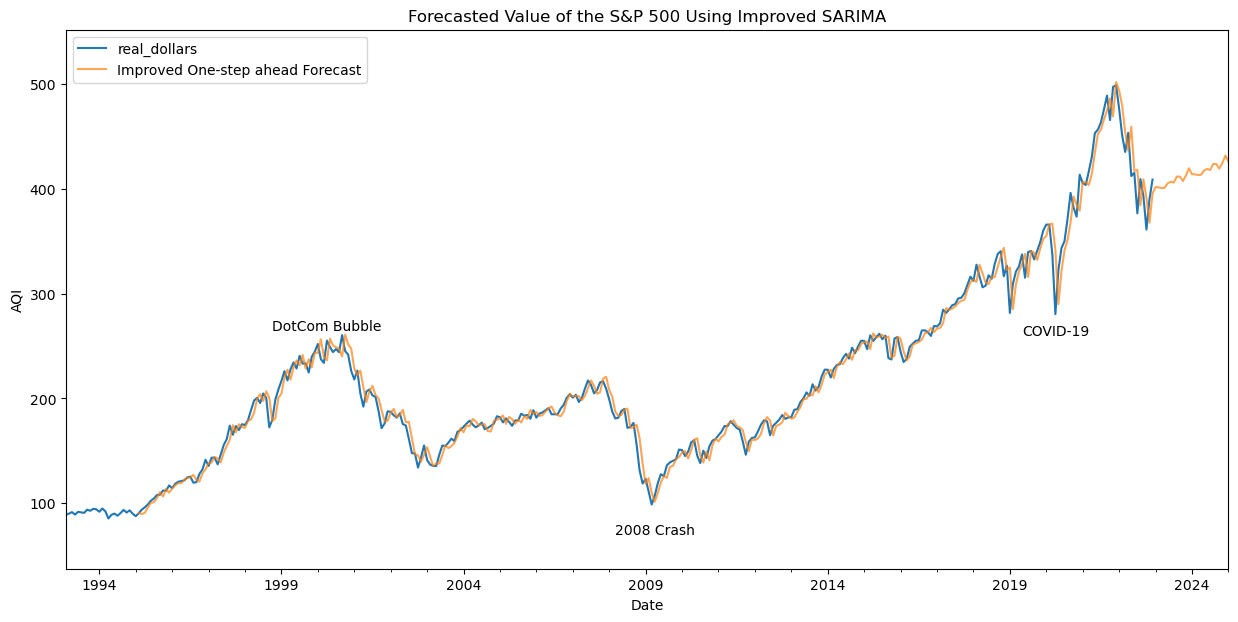

In [76]:
#plot overlay of inflation adjusted S&P 500 vs the improved SARIMA model with forecasted values 
pred = results.get_prediction(start=pd.to_datetime('1995-02-01'),end = pd.to_datetime('2025-01-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = SARIMA.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Improved One-step ahead Forecast', alpha=.7, figsize=(15, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
#label axes and title plot
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.title("Forecasted Value of the S&P 500 Using Improved SARIMA")
#label major economic events so outliers are explained
plt.text(345,265,'DotCom Bubble')
plt.text(458,70,'2008 Crash')
plt.text(592,260,'COVID-19')
plt.legend()
plt.show()

#### The improved SARIMA method utilizing the AIC score to determine the best parameter combination generated a much more accurate model. This is displayed by the above graph where you can see that the 'Improved One-step ahead Forecast' much more closely tracks the actual value of the S&P 500 data and thus the future forecasted values are also much more accurate compared to the first method. The future forecasted data is also much less volatile than the original machine learning method which is more reasonable to assume that the real future performance of the market wouldnt suddenly spike in volatility. Given the more accurate nature, the improved machine learning SARIMA model utilizing the Akaike Information Criterion score proved to be a very good way to increase the confidence in the machine learning model.